## requirements and initial settings

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.feature_selection import RFE, SelectKBest
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,confusion_matrix

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

warnings.filterwarnings(action='ignore')
pd.set_option("display.max_columns", 30)

%matplotlib inline

## load data

In [2]:
data = arff.loadarff('C:/Users/mahdi/temp/programming/git_repos/ML_git/examples/v1.2/data/Autism-Child-Data.arff')
df= pd.DataFrame(data[0])

### decoding

In [3]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',6.0,b'm',b'Others',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
1,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',6.0,b'm',b'Middle Eastern ',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
2,b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'1',b'0',b'0',6.0,b'm',b'?',b'no',b'no',b'Jordan',b'yes',5.0,b'4-11 years',b'?',b'NO'
3,b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',5.0,b'f',b'?',b'yes',b'no',b'Jordan',b'no',4.0,b'4-11 years',b'?',b'NO'
4,b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',5.0,b'm',b'Others',b'yes',b'no',b'United States',b'no',10.0,b'4-11 years',b'Parent',b'YES'


In [4]:
print(example_data:= df.iloc[1,1],type(df.iloc[1,1]))

b'1' <class 'bytes'>


In [5]:
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.decode('UTF-8')

In [6]:
df.tail(3)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
289,1,0,1,1,1,1,1,0,0,1,4.0,m,Latino,no,no,Brazil,no,7.0,4-11 years,Parent,YES
290,1,1,1,0,1,1,1,1,1,1,4.0,m,South Asian,no,no,India,no,9.0,4-11 years,Parent,YES
291,0,0,1,0,1,0,1,0,0,0,4.0,f,South Asian,no,no,India,no,3.0,4-11 years,Parent,NO


## data describtion

In [7]:
df.shape

(292, 21)

In [8]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         292 non-null    object 
 1   A2_Score         292 non-null    object 
 2   A3_Score         292 non-null    object 
 3   A4_Score         292 non-null    object 
 4   A5_Score         292 non-null    object 
 5   A6_Score         292 non-null    object 
 6   A7_Score         292 non-null    object 
 7   A8_Score         292 non-null    object 
 8   A9_Score         292 non-null    object 
 9   A10_Score        292 non-null    object 
 10  age              288 non-null    float64
 11  gender           292 non-null    object 
 12  ethnicity        292 non-null    object 
 13  jundice          292 non-null    object 
 14  austim           292 non-null    object 
 15  contry_of_res    292 non-null    object 
 16  used_app_before  292 non-null    object 
 17  result          

## feature engineering

### basic

In [10]:
for col in df.columns:
    print(f'{col}:')
    print(df[col].unique())
    print()

A1_Score:
['1' '0']

A2_Score:
['1' '0']

A3_Score:
['0' '1']

A4_Score:
['0' '1']

A5_Score:
['1' '0']

A6_Score:
['1' '0']

A7_Score:
['0' '1']

A8_Score:
['1' '0']

A9_Score:
['0' '1']

A10_Score:
['0' '1']

age:
[ 6.  5.  4. 11. 10.  8.  7.  9. nan]

gender:
['m' 'f']

ethnicity:
['Others' 'Middle Eastern ' '?' 'White-European' 'Black' 'South Asian'
 'Asian' 'Pasifika' 'Hispanic' 'Turkish' 'Latino']

jundice:
['no' 'yes']

austim:
['no' 'yes']

contry_of_res:
['Jordan' 'United States' 'Egypt' 'United Kingdom' 'Bahrain' 'Austria'
 'Kuwait' 'United Arab Emirates' 'Europe' 'Malta' 'Bulgaria'
 'South Africa' 'India' 'Afghanistan' 'Georgia' 'New Zealand' 'Syria'
 'Iraq' 'Australia' 'Saudi Arabia' 'Armenia' 'Turkey' 'Pakistan' 'Canada'
 'Oman' 'Brazil' 'South Korea' 'Costa Rica' 'Sweden' 'Philippines'
 'Malaysia' 'Argentina' 'Japan' 'Bangladesh' 'Qatar' 'Ireland' 'Romania'
 'Netherlands' 'Lebanon' 'Germany' 'Latvia' 'Russia' 'Italy' 'China'
 'Nigeria' 'U.S. Outlying Islands' 'Nepal' 'Mex

In [11]:
droping_columns = ['ethnicity','contry_of_res','age_desc','relation']
df = df.drop(df[droping_columns],axis=1)

In [12]:
df.shape

(292, 17)

In [13]:
score_columns = []
for i in range(1,11):
    score_columns.append(f"A{i}_Score")
for col in score_columns:
    df[col] = df[col].astype(int)

In [14]:
for col in df.columns[:-1]:
    if df[col].dtypes not in [int,float]:
        print(col,'is not numeric')
        if len(df[col].unique())==2:
            df[col]=np.where(df[col]==df[col].unique()[0],0,1)
df[df.columns[-1]] = np.where(df[df.columns[-1]]=='NO',0,1)

gender is not numeric
jundice is not numeric
austim is not numeric
used_app_before is not numeric


In [15]:
for col in df.columns:
    print(f'{col}:')
    print(df[col].unique())
    print()

A1_Score:
[1 0]

A2_Score:
[1 0]

A3_Score:
[0 1]

A4_Score:
[0 1]

A5_Score:
[1 0]

A6_Score:
[1 0]

A7_Score:
[0 1]

A8_Score:
[1 0]

A9_Score:
[0 1]

A10_Score:
[0 1]

age:
[ 6.  5.  4. 11. 10.  8.  7.  9. nan]

gender:
[0 1]

jundice:
[0 1]

austim:
[0 1]

used_app_before:
[0 1]

result:
[ 5.  4. 10.  7.  8.  3.  9.  2.  1.  6.  0.]

Class/ASD:
[0 1]



In [16]:
df.iloc[:,:-1].describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,used_app_before,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,0.287671,0.273973,0.167808,0.037671,6.239726
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,0.453454,0.446761,0.374337,0.190727,2.284882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,0.000000,0.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,10.000000


### imputation

In [17]:
df.isna().any()

A1_Score           False
A2_Score           False
A3_Score           False
A4_Score           False
A5_Score           False
A6_Score           False
A7_Score           False
A8_Score           False
A9_Score           False
A10_Score          False
age                 True
gender             False
jundice            False
austim             False
used_app_before    False
result             False
Class/ASD          False
dtype: bool

In [18]:
df['age'].isna().sum()

4

In [19]:
df['age'] = df['age'].fillna(df['age'].median())

### creating input and output arrays

In [20]:
x , y = np.asanyarray(df[df.columns[:-1]]) , np.asanyarray(df['Class/ASD']).reshape(-1,1)
x.shape,y.shape

((292, 16), (292, 1))

### feature selection

#### RFE

In [21]:
logistic_model = LogisticRegression()

In [22]:
cols = list(df.columns[:-1])
X,Y = x.copy(),y.copy()
rfe = RFE(logistic_model,12)
rfe_fit = rfe.fit(X, Y)
rfe_ser = pd.Series(rfe.support_,index = cols)
selected_features_rfe = rfe_ser[rfe_ser==True].index
print(f'number of selected columns: {rfe_fit.n_features_}' )
print()
print(f'selected features ranking: {rfe_fit.ranking_}')
print()
print(selected_features_rfe)

number of selected columns: 12

selected features ranking: [1 1 1 1 1 1 1 1 1 1 3 5 1 4 2 1]

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'jundice', 'result'],
      dtype='object')


In [23]:
SB = SelectKBest(k=12)
SB_fit = SB.fit(X, Y)

features = SB_fit.get_support()
sb_ser = pd.Series(features,index = cols)
selected_features_sb = sb_ser[sb_ser==True].index
print(features)
print()
print('selected features: ',selected_features_sb)

[ True  True  True  True  True  True  True  True  True  True  True False
 False False False  True]

selected features:  Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result'],
      dtype='object')


In [24]:
def common_members(a, b):
    a_set = set(a)
    b_set = set(b)

    if (a_set & b_set):
        return(a_set & b_set)

com_mems=sorted(list(common_members(selected_features_sb,selected_features_rfe)))
poped = com_mems.pop(0)
com_mems.insert(-1,poped)
print(com_mems)
selected_df = df[com_mems]

['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'result']


## data visualition

In [25]:
plt.style.use('ggplot')

### box plot

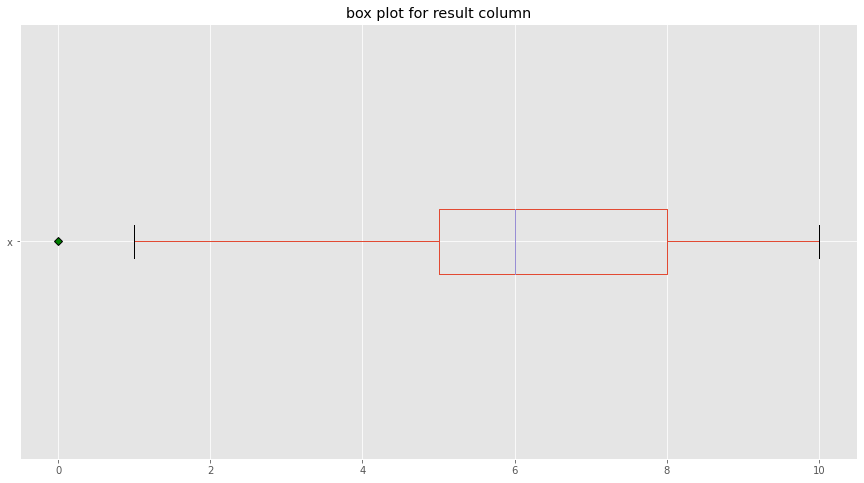

In [26]:
fig1 = plt.figure(figsize=(15,8))
green_diamond = dict(markerfacecolor='g', marker='D')
pd.plotting.boxplot(df['result'],vert=False,flierprops=green_diamond);

plt.title('box plot for result column');

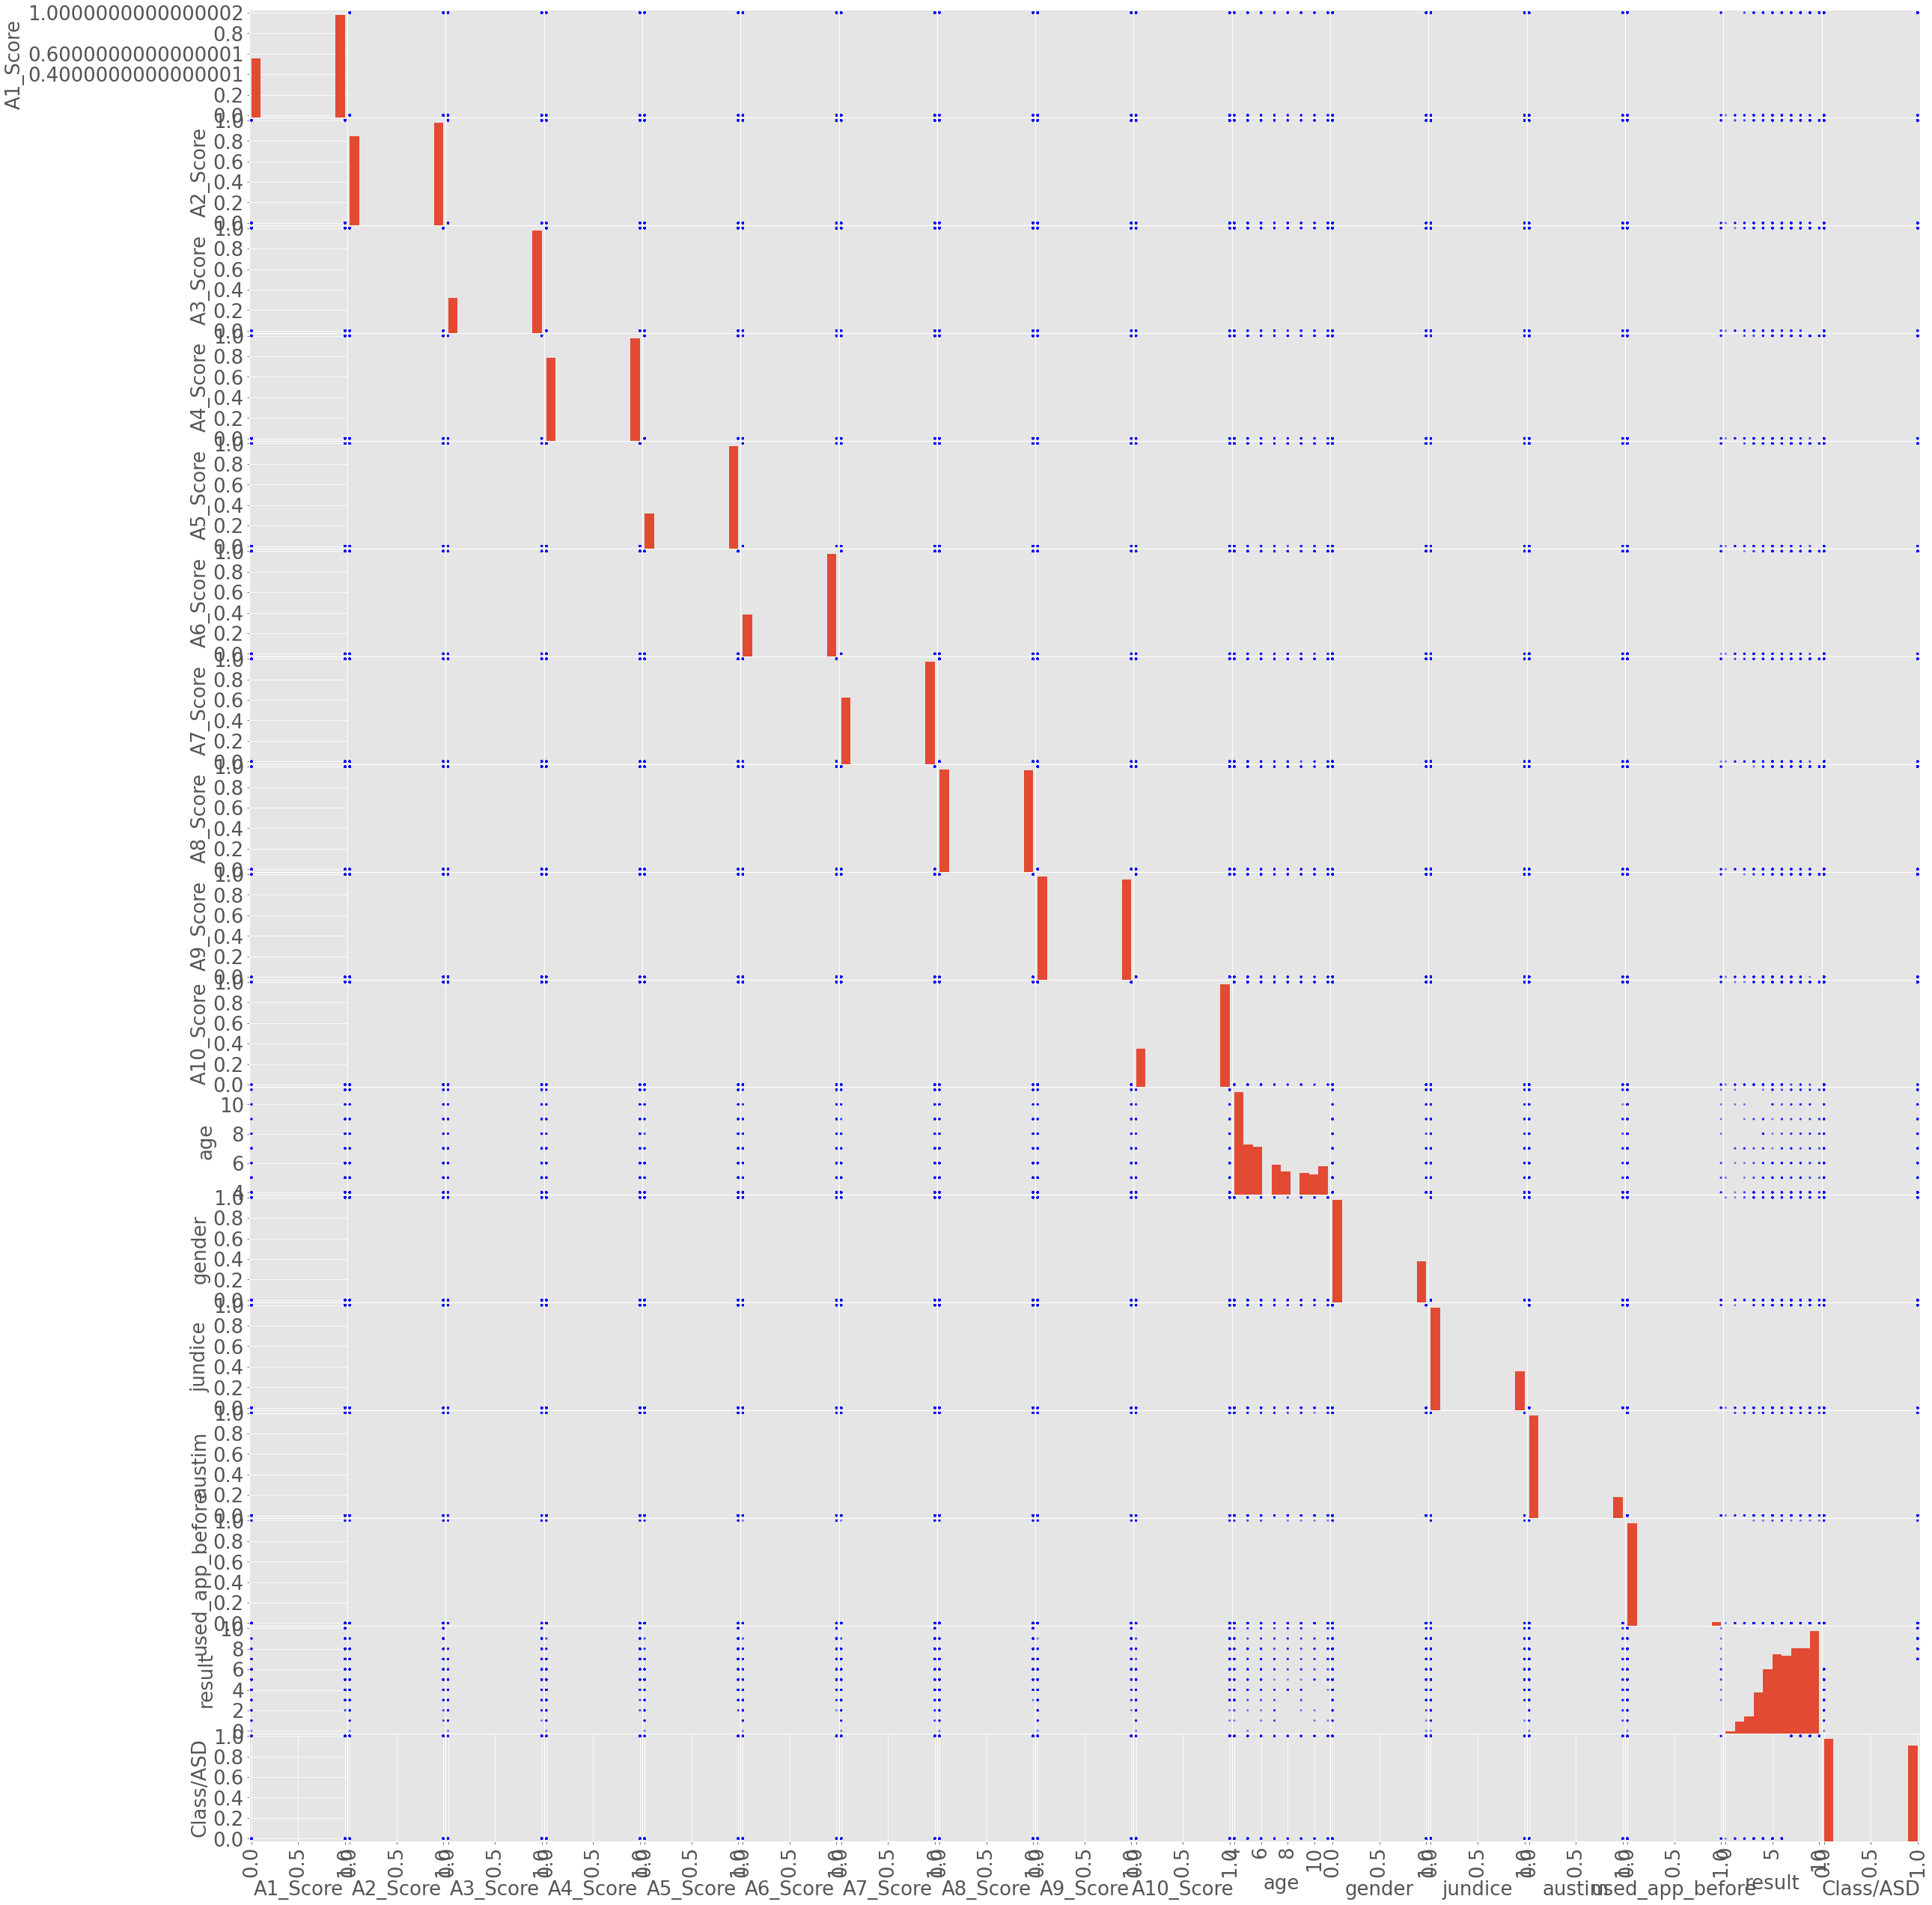

In [27]:
Axes = pd.plotting.scatter_matrix(df,color='b',figsize=(40,45));
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 26) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 26) for item in Axes.ravel()]
[plt.setp(item.yaxis.get_label(), 'size', 26) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_label(), 'size', 26) for item in Axes.ravel()];

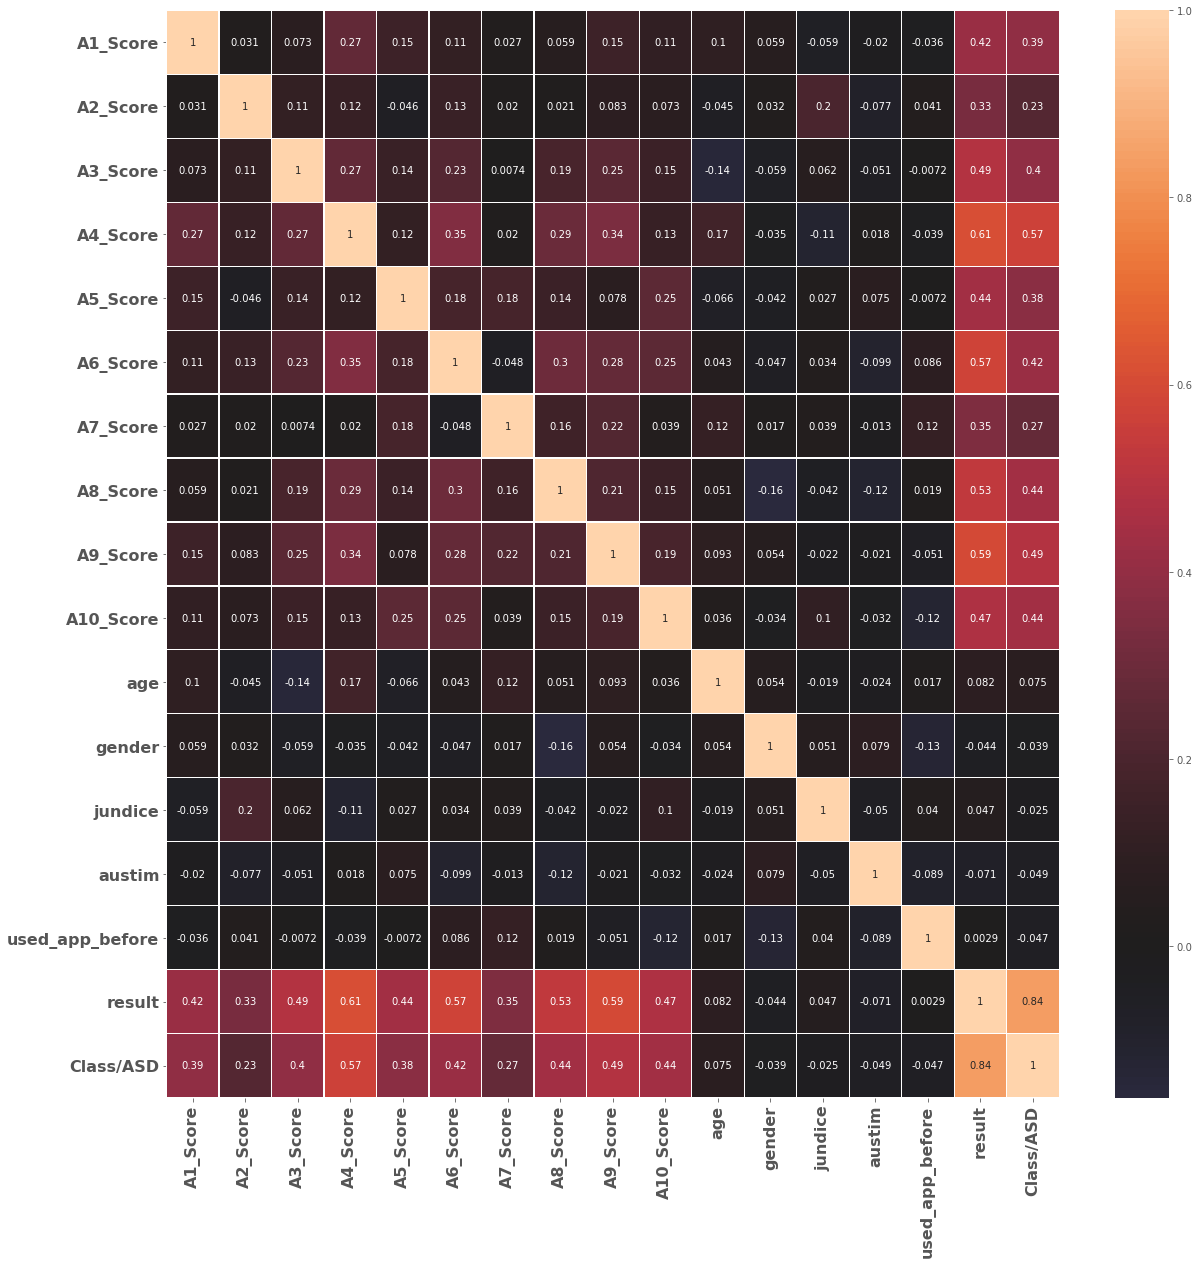

In [28]:
fig2 = plt.figure(figsize=(20,20))
plt.xticks(fontsize=16,weight = 'bold')
plt.yticks(fontsize=16,weight = 'bold')
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, center=0, annot=True,lw=.2);

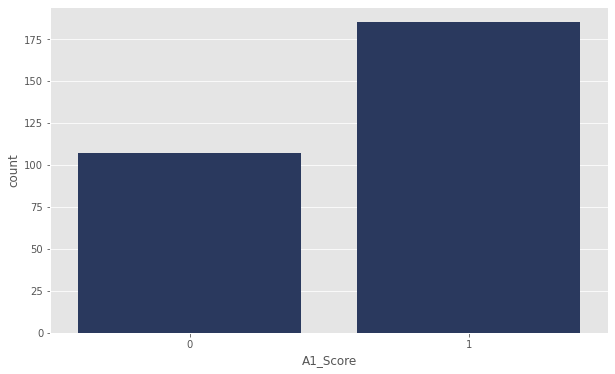

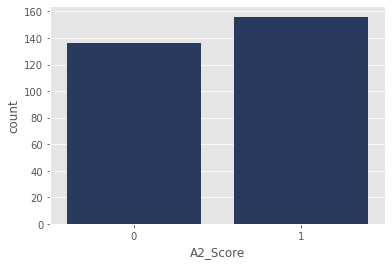

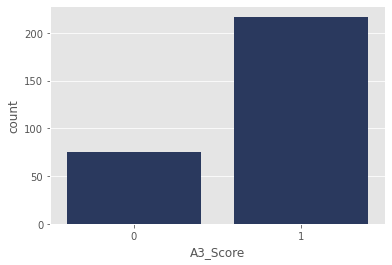

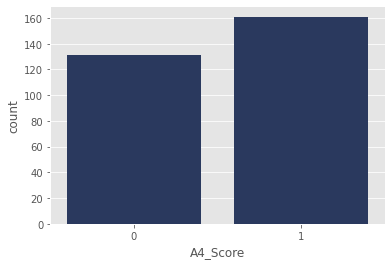

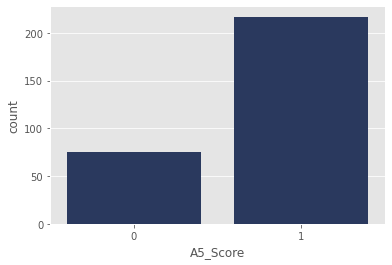

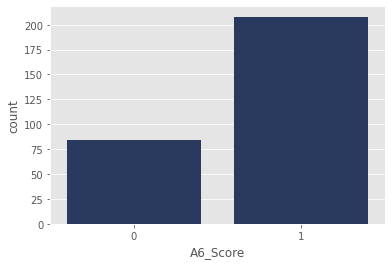

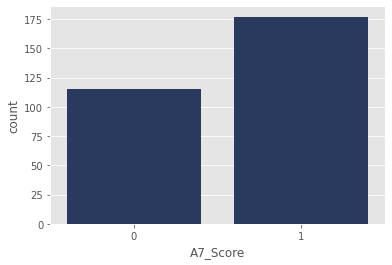

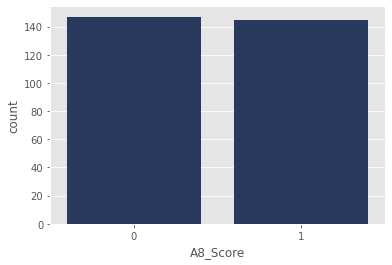

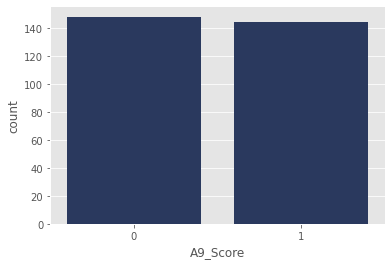

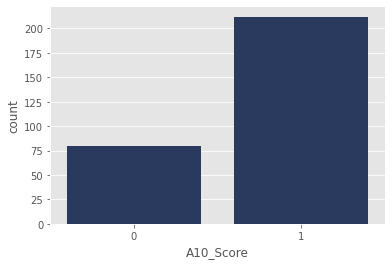

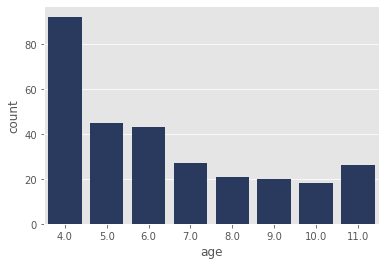

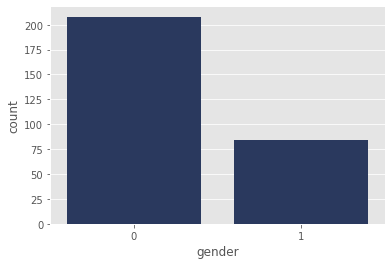

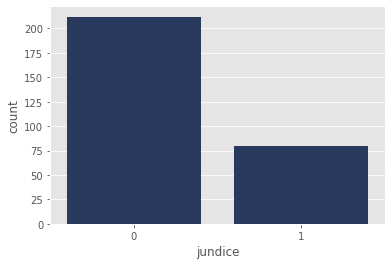

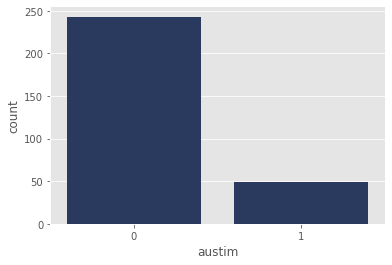

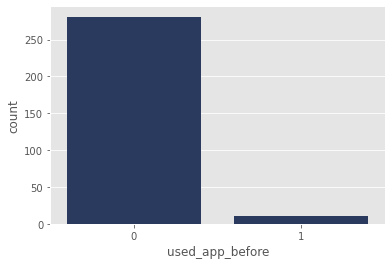

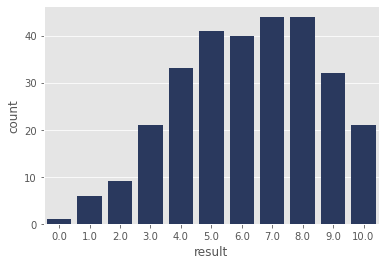

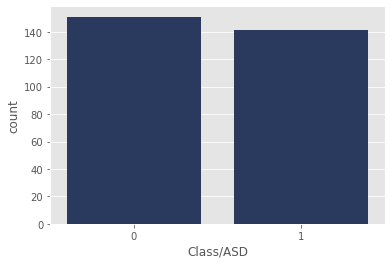

In [29]:
fig3 = plt.figure(figsize=(10,6))
for col in df.columns:
    sns.countplot(df[col],color='#213567');
    plt.show()

## model training

In [30]:
x,y = np.asanyarray(selected_df[com_mems]) , y
x.shape , y.shape

((292, 11), (292, 1))

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [32]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(219, 11) (73, 11) (219, 1) (73, 1)


In [33]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(7, 3), random_state=1)
dt_clf = DecisionTreeRegressor()
logistic_clf = LogisticRegression()

In [34]:
mlp_clf.fit(x_train,y_train)
dt_clf.fit(x_train,y_train)
logistic_clf.fit(x_train,y_train);

In [35]:
mlp_prediction = mlp_clf.predict(x_test)
dt_prediction = dt_clf.predict(x_test)
logistic_prediction = logistic_clf.predict(x_test)

In [36]:
print("accuracy score for mlp classifier:",accuracy_score(y_test,mlp_prediction))
print()
print("accuracy score for decision tree classifier: ",accuracy_score(y_test,dt_prediction))
print()
print("accuracy score for logistic regression classifier: ",accuracy_score(y_test,logistic_prediction))

accuracy score for mlp classifier: 0.9452054794520548

accuracy score for decision tree classifier:  1.0

accuracy score for logistic regression classifier:  1.0


In [37]:
print(classification_report(y_test,mlp_prediction))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        34
           1       0.93      0.97      0.95        39

    accuracy                           0.95        73
   macro avg       0.95      0.94      0.94        73
weighted avg       0.95      0.95      0.95        73



In [38]:
print(classification_report(y_test,dt_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        39

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



In [39]:
print(classification_report(y_test,logistic_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        39

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



In [40]:
print(mean_squared_error(y_test,mlp_prediction))
print(mean_squared_error(y_test,dt_prediction))
print(mean_squared_error(y_test,logistic_prediction))

0.0547945205479452
0.0
0.0


In [41]:
print(confusion_matrix(y_test,mlp_prediction))
print()
print(confusion_matrix(y_test,dt_prediction))
print()
print(confusion_matrix(y_test,logistic_prediction))

[[31  3]
 [ 1 38]]

[[34  0]
 [ 0 39]]

[[34  0]
 [ 0 39]]
